<a href="https://colab.research.google.com/github/AshaRaniKulhade/Assignments/blob/main/Pandas_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import plotly.graph_objs as go

In [19]:
df= pd.read_csv('/content/customer_supermarket.csv',sep='\t',index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  object 
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


##Bsic Check

In [21]:
n_sample = df.shape[0]
n_sample

471910

In [30]:
df.drop_duplicates(ignore_index=True,inplace= True)
df.shape

(466678, 8)

In [28]:
duplicates = n_sample-df.shape[0]
print('Number of Cancelled duplicate {}/{} ({:.2f}%)'.format(duplicates,n_sample, duplicates/n_sample*100))

Number of Cancelled duplicate 5232/471910 (1.11%)


In [32]:
print(df.dtypes)

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object


In [33]:
df['Sale']= df['Sale'].str.replace(',','.')
df['Sale'] = pd.to_numeric(df['Sale'])
df= df.astype({'BasketDate':'datetime64', 'CustomerID':'object'})

AttributeError: ignored

In [9]:
df.head(10)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
5,536365,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2
6,536365,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,536366,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,22633,HAND WARMER UNION JACK,6
8,536366,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,22632,HAND WARMER RED POLKA DOT,6
9,536368,2010-01-12 08:34:00,4.25,13047.0,United Kingdom,22960,JAM MAKING SET WITH JARS,6


#Data Exploration

In [10]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [34]:
n_samples = df.shape[0]
null_customers = df['CustomerID'].isnull().sum()
print('Number of Null CustomerID(s): {}/{} ({:.2f}%)'.format(null_customers,n_sample, null_customers/n_sample*100))

Number of Null CustomerID(s): 65073/471910 (13.79%)


In [35]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df['CustomerID'].isnull().any()

False

In [36]:
df = df[df['Qta'] >= 0]
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
401600,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
401601,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
401602,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
401603,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [37]:
special_codes = df[df['ProdID'].str.contains('^[a-zA-Z]+',regex=True)]['ProdID'].unique()
for code in special_codes:
  print('{:<15}-> {:<30}'.format(code,df[df['ProdID']==code]['ProdDescr'].unique()[0]))

POST           -> POSTAGE                       
C2             -> CARRIAGE                      
M              -> Manual                        
BANK CHARGES   -> Bank Charges                  
PADS           -> PADS TO MATCH ALL CUSHIONS    
DOT            -> DOTCOM POSTAGE                


In [38]:
canceled_orders = df[df['BasketID'].str.contains('C')]
canceled_orders

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta


In [16]:
(canceled_orders['Qta']<0).all()

True

In [39]:
df['Total_Revenue'] = df['Sale'] * df['Qta']
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Total_Revenue
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...,...,...,...,...,...,...
401600,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60
401601,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
401602,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60
401603,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85


In [40]:
df.describe()

,Sale,Qta,Total_Revenue
count,392733.000000,392733.000000,392733.000000
mean,3.125633,13.153687,22.629183
std,22.240710,181.588189,311.083069
min,0.000000,1.000000,0.000000
25%,1.250000,2.000000,4.950000
50%,1.950000,6.000000,12.390000
75%,3.750000,12.000000,19.800000
max,8142.750000,80995.000000,168469.600000


In [41]:
min_date = df['BasketDate'].min()
max_date = df['BasketDate'].max()
print("Date Range - From:", min_date, "To:", max_date)

Date Range - From: 2010-01-12 08:26:00 To: 2011-12-10 17:19:00


In [51]:
frequency = df.groupby('CustomerID')['BasketDate'].count()
frequency = frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
print(frequency)
print(frequency.info())

      CustomerID  Frequency
0        12346.0          1
1        12347.0        182
2        12348.0         31
3        12349.0         73
4        12350.0         17
...          ...        ...
4334     18280.0         10
4335     18281.0          7
4336     18282.0         12
4337     18283.0        721
4338     18287.0         70

[4339 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Frequency   4339 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 67.9 KB
None


In [48]:
grouped = df.groupby('CustomerID').agg({'Qta':'sum','Sale':'sum','Total_Revenue':'sum','BasketDate': lambda v: (max_date - v.max()).days}).reset_index()
print(grouped)

      CustomerID    Qta     Sale  Total_Revenue  BasketDate
0        12346.0  74215     1.04       77183.60         326
1        12347.0   2458   481.21        4310.00          40
2        12348.0   2341   178.71        1797.24          76
3        12349.0    631   605.10        1757.55          19
4        12350.0    197    65.30         334.40         311
...          ...    ...      ...            ...         ...
4334     18280.0     45    47.65         180.60         160
4335     18281.0     54    39.36          80.82           4
4336     18282.0    103    62.39         178.05         216
4337     18283.0   1357  1174.33        2045.53          10
4338     18287.0   1586   104.55        1837.28           0

[4339 rows x 5 columns]


In [52]:
RFM = pd.merge(frequency, grouped, on='CustomerID', how='outer')
print(RFM)

      CustomerID  Frequency    Qta     Sale  Total_Revenue  BasketDate
0        12346.0          1  74215     1.04       77183.60         326
1        12347.0        182   2458   481.21        4310.00          40
2        12348.0         31   2341   178.71        1797.24          76
3        12349.0         73    631   605.10        1757.55          19
4        12350.0         17    197    65.30         334.40         311
...          ...        ...    ...      ...            ...         ...
4334     18280.0         10     45    47.65         180.60         160
4335     18281.0          7     54    39.36          80.82           4
4336     18282.0         12    103    62.39         178.05         216
4337     18283.0        721   1357  1174.33        2045.53          10
4338     18287.0         70   1586   104.55        1837.28           0

[4339 rows x 6 columns]


In [54]:
columns_order = ['CustomerID', 'Qta', 'Sale','BasketDate','Frequency','Total_Revenue']
RFM = RFM[columns_order]
RFM

,CustomerID,Qta,Sale,BasketDate,Frequency,Total_Revenue
0,12346.0,74215,1.04,326,1,77183.60
1,12347.0,2458,481.21,40,182,4310.00
2,12348.0,2341,178.71,76,31,1797.24
3,12349.0,631,605.10,19,73,1757.55
4,12350.0,197,65.30,311,17,334.40
...,...,...,...,...,...,...
4334,18280.0,45,47.65,160,10,180.60
4335,18281.0,54,39.36,4,7,80.82
4336,18282.0,103,62.39,216,12,178.05
4337,18283.0,1357,1174.33,10,721,2045.53


In [55]:
RFM.columns = ['CustomerID', 'Qta','Sale','Recency','Frequency','Monetary']
RFM

,CustomerID,Qta,Sale,Recency,Frequency,Monetary
0,12346.0,74215,1.04,326,1,77183.60
1,12347.0,2458,481.21,40,182,4310.00
2,12348.0,2341,178.71,76,31,1797.24
3,12349.0,631,605.10,19,73,1757.55
4,12350.0,197,65.30,311,17,334.40
...,...,...,...,...,...,...
4334,18280.0,45,47.65,160,10,180.60
4335,18281.0,54,39.36,4,7,80.82
4336,18282.0,103,62.39,216,12,178.05
4337,18283.0,1357,1174.33,10,721,2045.53


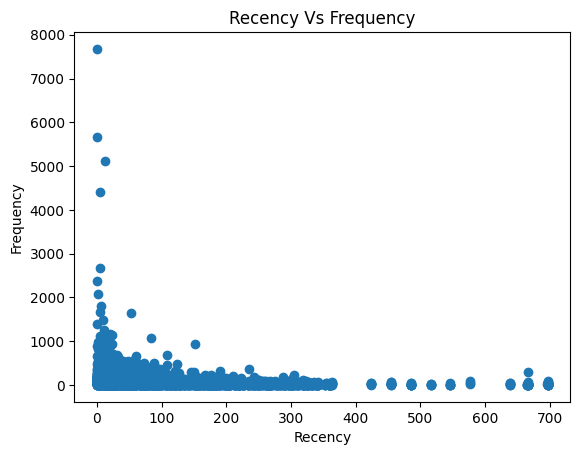

In [56]:
# Choose the columns for the scatter plot
x_data = RFM['Recency']
y_data = RFM['Frequency']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Vs Frequency')

# Show the plot
plt.show()

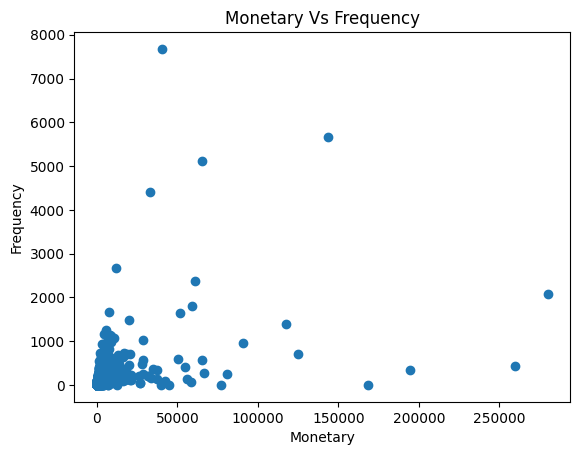

In [57]:
# Choose the columns for the scatter plot
x_data = RFM['Monetary']
y_data = RFM['Frequency']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Vs Frequency')

# Show the plot
plt.show()

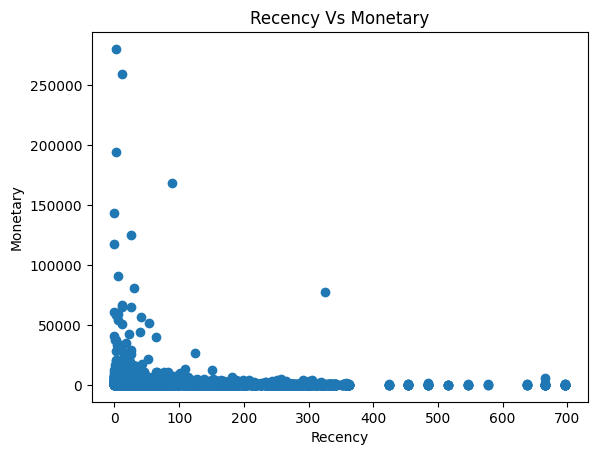

In [58]:
# Choose the columns for the scatter plot
x_data = RFM['Recency']
y_data = RFM['Monetary']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Add labels and a title (customize as needed)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency Vs Monetary')

# Show the plot
plt.show()